# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

**The task of this problem is to create a regression model that will estimate the sale prices of homes in Ames, IA based off data that was collected on various homes in the Ames, IA along with their resultant sales price. The expectations from this problem are that there will be a model that can effectively predict the cost of homes given a set of training data using the techniques that were taught. This model can be beneficial to users as it can show individuals the sales prices of homes based off the houses characteristics and can help people make decisions on purchasing properties. Individuals can look at homes that have certain traits that match their preferences and the model can help calculate the price of a home that they may want to buy. The performance of the model will be evaulated with a reduced mean square error. This method of evaluation will give a numerical representation of how far the predicted sales price is from the actual observed sales price from the given data. There are 1,460 homes and 80 features in the data that the model was trained. The learning algorithm that is to be used on for this model is a Random Forest Regressor. The amount of effort that is to be put into this project is relatively high. As this is an introductory assignment to machine learning, understanding the basics is extremely important. Although the aim is to try and predict the sales price of homes as accurately as possible, making the reduces mean square error insanely small is not something that is necessary. Some assumptions that have been made for this particular problem is that we are assuming that the data provided is a good representation of homes in Ames, IA; another assumption is that the features of the data are also helpful and can help our model effectively make predictions; another assumption is that this problem can be solved with a regression type approach like one mentioned above; lastly, another assumption is that each data point is unique to one another.**

In [ ]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

The dataset is 924.0+ KB and it has 1460 entires. each of these entries have 80 features and it contains 43 categorical data. There are some missing values (NaN) throughout the dataset, where some columns are majority NaN, and these will most likely be dropped in the cleaning step. Some basic statistics that I can learn right away about this dataset is that the average rating of the overall quality and overall conditions of the house are 6.1	and 5.6 respectively. The average garage area of the houses are 473.0 square feet.

In [ ]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('train.csv')
  return housing

housing = loadBostonHousingData()
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


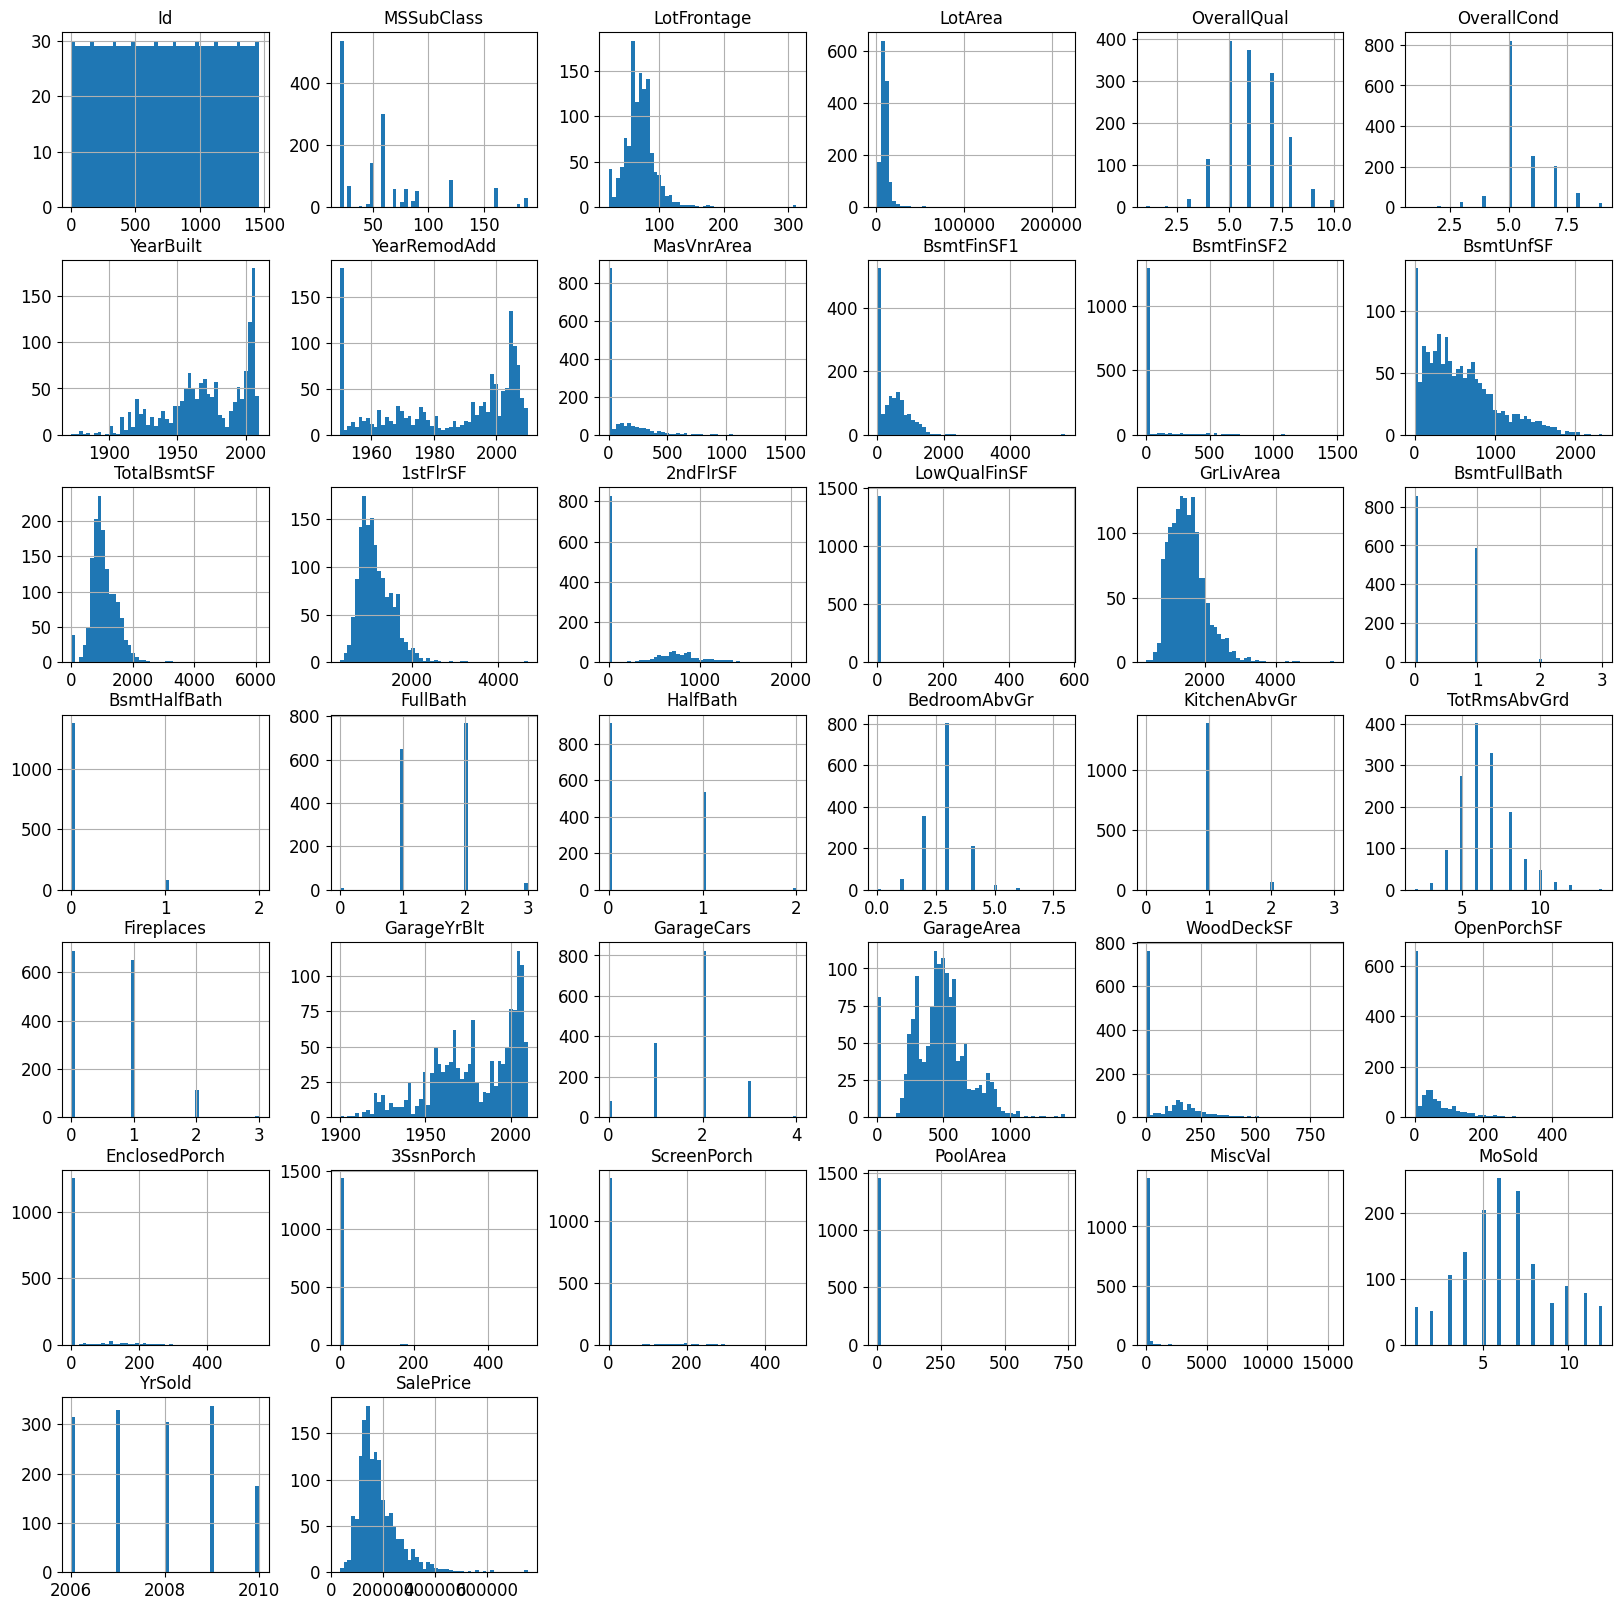

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20,20))
plt.show()
#save_fig("attribute_histogram_plots")

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 73)

In [ ]:
print(train_set.shape)
print(test_set.shape)

(1168, 81)
(292, 81)


<Axes: >

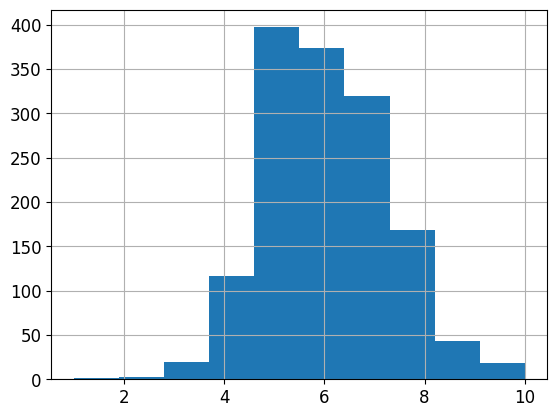

In [ ]:
housing["OverallQual"].hist()

In [ ]:
housing["cond_cat"] = pd.cut(housing["OverallQual"], bins=[-np.inf,3,4,5,6,7,8,9,np.inf], labels=[1,2,3,4,5,6,7,8])

In [ ]:
housing["cond_cat"].value_counts()

3    397
4    374
5    319
6    168
2    116
7     43
1     25
8     18
Name: cond_cat, dtype: int64

<Axes: >

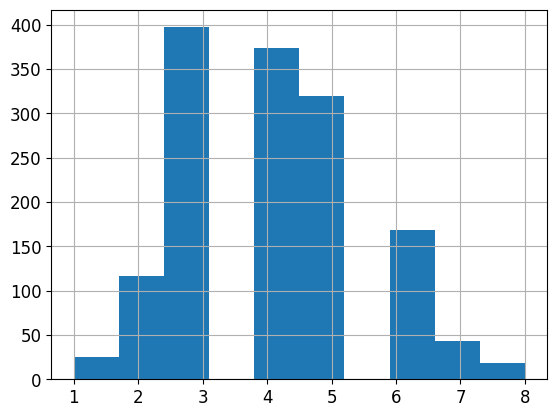

In [ ]:
housing["cond_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=73)
for train_index, test_index in split.split(housing, housing["cond_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [ ]:
# Your code to visualize the data here
for set_ in(strat_train_set, strat_test_set):
    set_.drop("cond_cat", axis = 1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

In [ ]:
corr_matrix = housing.corr()
corr_matrix.shape

<ipython-input-17-591c6c82d5ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


(38, 38)

In [ ]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.794624
GrLivArea        0.688720
GarageCars       0.642661
GarageArea       0.627363
1stFlrSF         0.598824
TotalBsmtSF      0.598625
FullBath         0.568309
YearBuilt        0.533382
TotRmsAbvGrd     0.531120
YearRemodAdd     0.522378
GarageYrBlt      0.502749
Fireplaces       0.469477
MasVnrArea       0.453140
BsmtFinSF1       0.348367
LotFrontage      0.346862
WoodDeckSF       0.306044
OpenPorchSF      0.303196
2ndFlrSF         0.293768
LotArea          0.264616
HalfBath         0.263621
BsmtUnfSF        0.233877
BsmtFullBath     0.215869
BedroomAbvGr     0.169110
ScreenPorch      0.125981
MoSold           0.058385
3SsnPorch        0.055235
PoolArea         0.006996
BsmtFinSF2       0.005033
Id              -0.019769
MiscVal         -0.021260
LowQualFinSF    -0.021851
YrSold          -0.037433
BsmtHalfBath    -0.047284
OverallCond     -0.067049
MSSubClass      -0.105406
EnclosedPorch   -0.140751
KitchenAbvGr    -0.151379
Name: SalePr

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='1

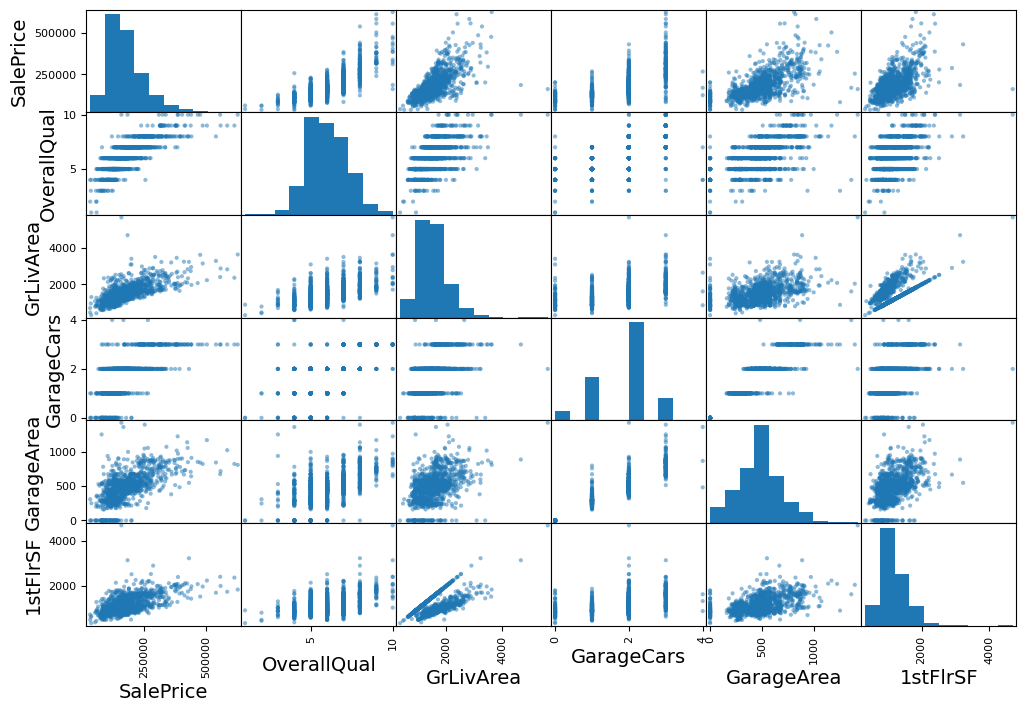

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF"]

scatter_matrix(housing[attributes], figsize=(12,8))
# save_fig("scatter_matrix_plot")

(0.0, 16.0, 0.0, 550000.0)

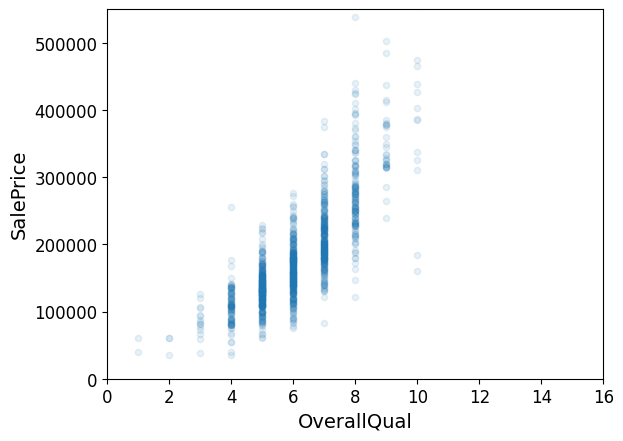

In [ ]:
housing.plot(kind = "scatter", x = "OverallQual", y = "SalePrice", alpha = 0.1)
plt.axis([0,16,0,550000])
# save_fig("quality_vs_sale_price")

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
housing = strat_train_set.drop("SalePrice", axis = 1)
housing_labels = strat_train_set["SalePrice"].copy()

In [ ]:
housing = housing.drop(["Id","Alley", "FireplaceQu","PoolQC","Fence","MiscFeature"],axis = 1)

In [ ]:
housing.shape

(1168, 74)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([5.0000e+01, 6.9000e+01, 9.4445e+03, 6.0000e+00, 5.0000e+00,
       1.9725e+03, 1.9930e+03, 0.0000e+00, 3.7950e+02, 0.0000e+00,
       4.6650e+02, 1.0025e+03, 1.0930e+03, 0.0000e+00, 0.0000e+00,
       1.4660e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9790e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.4000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

In [ ]:
X = imputer.transform(housing_num)
print(X)

[[8.0000e+01 5.9000e+01 9.5870e+03 ... 0.0000e+00 7.0000e+00 2.0080e+03]
 [2.0000e+01 7.0000e+01 7.0000e+03 ... 0.0000e+00 4.0000e+00 2.0070e+03]
 [2.0000e+01 6.0000e+01 7.1800e+03 ... 0.0000e+00 5.0000e+00 2.0080e+03]
 ...
 [1.2000e+02 4.1000e+01 5.3300e+03 ... 0.0000e+00 8.0000e+00 2.0070e+03]
 [1.6000e+02 2.1000e+01 1.6800e+03 ... 0.0000e+00 5.0000e+00 2.0060e+03]
 [6.0000e+01 8.3000e+01 1.0005e+04 ... 0.0000e+00 3.0000e+00 2.0080e+03]]


In [ ]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index = housing.index)

In [ ]:
housing_cat = housing.select_dtypes(include = [object])
housing_cat.head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1258,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1102,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Family
194,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
699,FV,Pave,IR2,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1181,RM,Pave,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,New,Partial
291,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,...,SBrkr,Fa,Typ,NaN,NaN,NaN,NaN,N,WD,Normal
302,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1322,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
52,RM,Grvl,IR2,Bnk,AllPub,Corner,Mod,IDOTRR,RRNn,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Normal
954,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,AdjLand


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# OrdinalEncoder encodes consecutive numbers for the categories (5 categories --> 0,1,2,3,4)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[ 3.,  1.,  0.,  3.,  0.,  4.,  0.,  8.,  2.,  2.,  0.,  7.,  1.,
         1., 12., 12.,  3.,  2.,  4.,  2.,  2.,  3.,  1.,  2.,  5.,  1.,
         0.,  1.,  4.,  2.,  6.,  1.,  0.,  4.,  4.,  2.,  8.,  4.],
       [ 3.,  1.,  3.,  3.,  0.,  4.,  0., 12.,  2.,  2.,  0.,  2.,  1.,
         1., 13., 13.,  1.,  3.,  4.,  1.,  3.,  3.,  3.,  4.,  5.,  1.,
         0.,  1.,  4.,  3.,  6.,  1.,  1.,  4.,  4.,  2.,  8.,  3.],
       [ 3.,  1.,  0.,  3.,  0.,  4.,  0.,  5.,  2.,  2.,  0.,  2.,  3.,
         1.,  6.,  6.,  2.,  3.,  4.,  1.,  3.,  3.,  0.,  0.,  5.,  1.,
         4.,  1.,  4.,  3.,  6.,  5.,  2.,  4.,  4.,  2.,  8.,  4.],
       [ 1.,  1.,  1.,  3.,  0.,  4.,  0., 21.,  2.,  2.,  4.,  2.,  1.,
         1.,  8.,  8.,  2.,  2.,  4.,  2.,  2.,  3.,  2.,  2.,  5.,  1.,
         0.,  1.,  4.,  2.,  6.,  1.,  1.,  4.,  4.,  2.,  8.,  4.],
       [ 4.,  1.,  0.,  1.,  0.,  4.,  1.,  6.,  2.,  2.,  4.,  2.,  3.,
         1.,  5.,  5.,  3.,  0.,  4.,  2.,  0.,  3.,  1.,  2.,  5.,

In [ ]:
ordinal_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<1168x243 sparse matrix of type '<class 'numpy.float64'>'
	with 44384 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
cat_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
print(housing.shape)
print(housing_prepared.shape)

(1168, 74)
(1168, 279)


In [ ]:
housing_prepared.toarray()

array([[ 0.56947054, -0.51453602, -0.10136603, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86094148,  0.02048816, -0.33929328, ...,  1.        ,
         0.        ,  0.        ],
       [-0.86094148, -0.46589746, -0.32273862, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.52307855, -1.39003015, -0.49288373, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.47668656, -2.36280139, -0.82857544, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.09266653,  0.65278947, -0.06292243, ...,  0.        ,
         1.        ,  0.        ]])

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
# Try a few models here
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [199416.23243462 123356.75058829 124325.65819921 188427.25317661
 330764.98051222]


In [ ]:
print("Labels:", list(some_labels))

Labels: [190000, 135000, 127000, 196000, 392500]


In [ ]:
some_data_prepared.toarray()

array([[ 0.56947054, -0.51453602, -0.10136603, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86094148,  0.02048816, -0.33929328, ...,  1.        ,
         0.        ,  0.        ],
       [-0.86094148, -0.46589746, -0.32273862, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.52307855, -0.51453602, -0.58926864, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.52307855, -0.27134321, -0.46924736, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20108.004782359647

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=73)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=73)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv = 5)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [49864.17050888 41136.95973973 35582.34156001 37827.64759465
 47370.51206844]
Mean: 42356.32629434246
Standard deviation: 5466.12181473242


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring = "neg_mean_squared_error", cv = 5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [57827.88906052 29983.49812952 25621.36465597 25099.94319417
 39356.38912221]
Mean: 35577.81683247797
Standard deviation: 12243.827019161678


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100, random_state=73)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=73)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11087.377963749464

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring = "neg_mean_squared_error", cv = 5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [43472.12217183 29833.36150832 24284.14191039 23059.30354632
 32501.32952579]
Mean: 30630.05173253075
Standard deviation: 7302.629233782474


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 40, 60, 80, 100], 'max_features': [2, 4, 6, 8, 10, 12,14,16,18,20,22,24,26,28,30,32,34]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 40, 60], 'max_features': [2, 3, 4, 6, 8, 10, 12,14,16,18,20]},
  ]

forest_reg = RandomForestRegressor(random_state=73)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=73),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                           22, 24, 26, 28, 30, 32, 34],
                          'n_estimators': [3, 10, 30, 40, 60, 80, 100]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 6, 8, 10, 12, 14, 16, 18,
                                           20],
                          'n_estimators': [3, 10, 30, 40, 60]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 34, 'n_estimators': 100}

In [ ]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

46698.54284668837 {'max_features': 2, 'n_estimators': 3}
37310.79644714945 {'max_features': 2, 'n_estimators': 10}
36526.8484890227 {'max_features': 2, 'n_estimators': 30}
37084.49036834273 {'max_features': 2, 'n_estimators': 40}
36869.625579390144 {'max_features': 2, 'n_estimators': 60}
36649.594717775246 {'max_features': 2, 'n_estimators': 80}
36548.93061100511 {'max_features': 2, 'n_estimators': 100}
42687.204240738385 {'max_features': 4, 'n_estimators': 3}
36878.31512270831 {'max_features': 4, 'n_estimators': 10}
35475.481430577274 {'max_features': 4, 'n_estimators': 30}
34786.53955662697 {'max_features': 4, 'n_estimators': 40}
34480.19403511226 {'max_features': 4, 'n_estimators': 60}
34428.732796237615 {'max_features': 4, 'n_estimators': 80}
34506.49121587746 {'max_features': 4, 'n_estimators': 100}
45108.44398438214 {'max_features': 6, 'n_estimators': 3}
36195.90700464376 {'max_features': 6, 'n_estimators': 10}
34678.011550238705 {'max_features': 6, 'n_estimators': 30}
34297.9982

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=400),
        'max_features': randint(low=1, high=60),
    }

forest_reg = RandomForestRegressor(random_state=73)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=73)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=73),
                   n_iter=100,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e05590e8cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e05590e9540>},
                   random_state=73, scoring='neg_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'max_features': 55, 'n_estimators': 73}

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

30799.09297751005 {'max_features': 23, 'n_estimators': 147}
30140.439090002685 {'max_features': 47, 'n_estimators': 395}
31454.08428767141 {'max_features': 17, 'n_estimators': 393}
34190.967520017395 {'max_features': 4, 'n_estimators': 322}
30424.780117186787 {'max_features': 39, 'n_estimators': 363}
32930.35522078098 {'max_features': 8, 'n_estimators': 357}
30101.503380895352 {'max_features': 54, 'n_estimators': 367}
32992.10564446224 {'max_features': 8, 'n_estimators': 181}
30506.88324823822 {'max_features': 44, 'n_estimators': 234}
30112.111859382847 {'max_features': 54, 'n_estimators': 303}
34614.46333003279 {'max_features': 4, 'n_estimators': 51}
30186.962727574966 {'max_features': 53, 'n_estimators': 357}
34244.880530432 {'max_features': 4, 'n_estimators': 342}
37084.49036834273 {'max_features': 2, 'n_estimators': 40}
31381.422590902544 {'max_features': 16, 'n_estimators': 361}
32235.0401282678 {'max_features': 12, 'n_estimators': 74}
30955.82958853945 {'max_features': 28, 'n_est

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.81140192e-03, 9.01684990e-03, 2.37835144e-02, 1.38267565e-01,
       3.47613212e-03, 4.23359177e-02, 1.60328309e-02, 1.06747680e-02,
       2.09369998e-02, 1.35055795e-03, 6.40852649e-03, 4.62797513e-02,
       4.87599543e-02, 1.98485475e-02, 5.62645874e-04, 8.01868113e-02,
       2.58180320e-03, 2.66554681e-04, 3.28726633e-02, 2.85221222e-03,
       4.52531375e-03, 1.76003996e-03, 1.91374231e-02, 2.20669660e-02,
       1.95560174e-02, 6.01013875e-02, 5.62568846e-02, 5.78175817e-03,
       1.18447101e-02, 9.90773993e-04, 4.10219823e-04, 1.97852590e-03,
       1.30379978e-05, 2.70467728e-04, 4.27249665e-03, 2.49028686e-03,
       2.31557673e-04, 1.84062831e-04, 3.96750793e-05, 1.24243067e-03,
       1.81004769e-03, 1.33970966e-05, 4.84250361e-05, 1.18721514e-03,
       2.33606090e-04, 3.71013185e-04, 1.05521692e-03, 1.19343858e-03,
       4.05463292e-04, 4.84341662e-04, 5.07891778e-04, 5.42583404e-06,
       8.50478208e-07, 5.03630703e-04, 7.43096966e-04, 2.03911528e-04,
      

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1382675649711693, 'OverallQual'),
 (0.08018681132982924, 'GrLivArea'),
 (0.06010138750791306, 'GarageCars'),
 (0.05625688459741394, 'GarageArea'),
 (0.04875995426978287, '1stFlrSF'),
 (0.04627975129778744, 'TotalBsmtSF'),
 (0.04233591767117024, 'YearBuilt'),
 (0.0328726632936452, 'FullBath'),
 (0.02378351436271755, 'LotArea'),
 (0.022066965955984116, 'Fireplaces'),
 (0.02093699980000864, 'BsmtFinSF1'),
 (0.019848547476207186, '2ndFlrSF'),
 (0.01955601739108215, 'GarageYrBlt'),
 (0.01913742312274727, 'TotRmsAbvGrd'),
 (0.016032830914597795, 'YearRemodAdd'),
 (0.011844710110367352, 'OpenPorchSF'),
 (0.01067476801754349, 'MasVnrArea'),
 (0.009016849898645643, 'LotFrontage'),
 (0.006408526486662732, 'BsmtUnfSF'),
 (0.005781758169017319, 'WoodDeckSF'),
 (0.0048114019163301505, 'MSSubClass'),
 (0.004525313747616826, 'BedroomAbvGr'),
 (0.004272496654604195, 'MoSold'),
 (0.003476132115643127, 'OverallCond'),
 (0.002852212221663508, 'HalfBath'),
 (0.0025818031988641965, 'BsmtFullBath'),
 (0

In [ ]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("SalePrice", axis=1)
y_test = strat_test_set["SalePrice"].copy()

#pd.set_option('display.max_columns', None)
#X_test

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

32233.418651783886

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

**The model that was created for this problem was able to effectively calculate the sales prices of homes in Ames, IA. Although the model is not extremely accurate, it does a good job at potentially showing users the price of homes that they may desire. At first, a decision tree regressor was used and output a reduced mean square error of 42,356.33 dollars;next, a linear regression method was used and it output a reduced mean square error of 35,577.82 dollars; then, a random forest regressor was used which output a reduced mean square error of 30,630.05 dollars. As this was the lowest reduced mean square error, the random forest regressor was used to create the model and was tuned. When the model was used on the test data, the reduced mean square error was 32,233.42 dollars. What worked while trying to find a solution to this problem was removing features that did not provide much help in improving the model. What did not work for this model was attempting to clean the data even more. It was not feasible to continually look at the data and try to pull very small amounts of data for very small improvements given the time it took to run some of the code. What also did not work that well in this problem was using linear regression and a decision tree regressor to create the model; the best learning algorithm was a random forest regressor. What I learned from this problem is how important the housing data is to the model; removing or adding data could change the prediction of the model by thousands, it depends on the weight that a specific feature has. Some insight moving forward to improve this solution would be that I may not stratify my data next time. I feel as if the data represents homes in Ames, IA quite well, so the model could perform better without it. Some more thoughts I have moving forward to improve the solution would be to remove even more features from the data as I feel that some may be misleading the model.**

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!